In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train = train.loc[:, train.max() != train.min()]
test = test.loc[:, test.max() != test.min()]

In [0]:
train['Y18'].isnull().sum(), train['Y18'].notnull().sum()
train_first_30 = train[train['Y18'].isnull()]
train_first_30.shape
train_later_3 = train[train['Y18'].notnull()]
train_later_3.shape

(432, 57)

In [0]:

X_train = train_first_30.loc[:, 'X00':'X39']
X_train
X_train = pd.concat([X_train, X_train], axis=0)
X_train = pd.concat([X_train, train_later_3.loc[:, 'X00':'X39']], axis=0)
X_train

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.00,82.4,71.3,101.1,56.1,0.3,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.00,81.2,121.8,165.3,0.0,0.4,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.00,86.1,232.0,144.0,0.0,0.6,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.00,87.7,0.0,115.9,294.1,0.1,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.00,88.9,0.0,124.7,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,2.5,23.88,95.3,333.1,274.9,275.5,0.9,89.7,10.5,1000.4,1007.5,0.0,0.0,1.2,1006.0,23.8,999.4,89.9,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5
4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,2.5,23.88,95.6,216.4,277.3,247.0,1.0,90.1,10.5,1000.3,1007.5,0.0,0.0,1.3,1006.0,23.6,999.4,91.3,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5
4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,256.1,299.1,0.6,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5
4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,255.1,0.0,0.6,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5


In [0]:
def momentValue(df, columns):
    for column in columns:
        temp_df = pd.DataFrame(df[column])
        temp_df['dummy'] = 0
        
        for i in range(1, temp_df.shape[0]):
            a = temp_df[column].iloc[i] - temp_df[column].iloc[i-1]
            if a > 0:
                temp_df['dummy'].iloc[i] = a
        
        df[column] = temp_df['dummy']
    
    return df

In [0]:
X_train = momentValue(X_train,['X11','X34'])
X_train = momentValue(X_train,['X04','X10','X21','X36','X39'])
test = momentValue(test,['X11','X34'])
test = momentValue(test,['X04','X10','X21','X36','X39'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
def scale(df,columns):
  for column in columns:
    df[column]=df[columns]/df[columns].max()
  return df

scale(X_train,['X13','X15','X17','X25','X35'])
scale(test,['X13','X15','X17','X25','X35'])

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,0.926924,0.926924,0.926924,1.1,94.7,0.0,1000.3,1007.6,0.0,0.926924,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.0,0.926924,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,0.932203,0.932203,0.932203,0.6,95.3,0.0,1000.2,1007.5,0.0,0.932203,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.0,0.932203,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.000000,0.000000,0.000000,0.0,93.9,0.0,1000.1,1007.4,0.0,0.000000,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.0,0.000000,0.0,85.0,60.8,0.0
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,0.702695,0.702695,0.702695,0.4,94.4,0.0,1000.1,1007.4,0.0,0.702695,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.0,0.702695,0.0,85.8,61.2,0.0
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,0.661851,0.661851,0.661851,0.8,95.7,0.0,1000.2,1007.3,0.0,0.661851,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.0,0.661851,0.0,87.3,61.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,0.0,88.1,0.182273,0.182273,0.182273,1.8,77.3,0.0,1005.2,1012.9,1.6,0.182273,4.5,1011.5,27.7,1004.9,76.6,23.6,24.4,1013.0,0.0,0.182273,0.0,79.7,67.5,0.0
11516,16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,0.0,75.5,0.144207,0.144207,0.144207,2.9,78.1,0.0,1005.2,1012.9,1.9,0.144207,4.7,1011.4,27.6,1004.9,76.7,25.3,24.4,1012.9,0.0,0.144207,0.0,79.6,67.9,0.0
11517,16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,1012.7,0.0,0.0,77.5,0.080578,0.080578,0.080578,2.9,78.9,0.0,1005.4,1013.0,2.3,0.080578,4.8,1011.4,27.5,1005.0,77.1,24.9,24.3,1012.9,0.0,0.080578,0.0,79.2,68.3,0.0
11518,16270,25.5,993.2,2.4,2.8,0.0,1011.8,993.7,26.1,1013.2,1012.6,0.0,0.0,74.1,0.083356,0.083356,0.083356,3.4,79.7,0.0,1005.3,1013.0,1.7,0.083356,3.5,1011.4,27.3,1005.0,77.3,25.3,24.2,1012.9,0.0,0.083356,0.0,80.1,68.8,0.0


In [0]:
X_train

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,0.198056,0.198056,0.198056,0.3,91.0,0.0,1002.5,1009.8,1.1,0.198056,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,0.198056,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,0.338333,0.338333,0.338333,0.4,91.9,0.0,1002.5,1009.9,0.0,0.338333,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,0.338333,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,0.644444,0.644444,0.644444,0.6,93.3,0.0,1002.4,1009.8,0.0,0.644444,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,0.644444,0.0,77.3,63.9,0.0
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.000000,0.000000,0.000000,0.1,93.4,0.0,1002.4,1009.7,0.0,0.000000,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,0.000000,0.0,77.5,64.5,0.0
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.000000,0.000000,0.000000,0.0,94.1,0.0,1002.4,1009.7,0.0,0.000000,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,0.000000,0.0,78.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,0.0,0.0,95.3,0.925278,0.925278,0.925278,0.9,89.7,0.0,1000.4,1007.5,0.0,0.925278,1.2,1006.0,23.8,999.4,89.9,17.7,19.1,1007.5,0.0,0.925278,0.0,82.3,58.6,0.0
4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,0.0,0.0,95.6,0.601111,0.601111,0.601111,1.0,90.1,0.0,1000.3,1007.5,0.0,0.601111,1.3,1006.0,23.6,999.4,91.3,17.7,19.2,1007.5,0.0,0.601111,0.0,82.5,59.1,0.0
4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,0.0,0.0,95.9,0.355000,0.355000,0.355000,0.6,90.8,0.0,1000.4,1007.6,0.0,0.355000,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,0.0,0.355000,0.0,83.0,58.9,0.0
4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,0.0,0.0,95.9,0.899444,0.899444,0.899444,0.6,91.5,0.0,1000.4,1007.6,0.0,0.899444,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,0.0,0.899444,0.0,83.2,59.8,0.0


In [0]:
#표준화 함수 생성
def standardization(df):
    mean = np.mean(df)
    std = np.std(df)
    norm = (df - mean) / (std - 1e-07)
    return norm, mean, std

In [0]:
# 학습데이터 표준화
X_train_norm, mean, std = standardization(X_train)

In [0]:
y_train = train_first_30.loc[:, 'Y16']
y_train = pd.concat([y_train, y_train], axis=0)
y_train = pd.concat([y_train, train_later_3.loc[:, 'Y18']], axis=0)
y_train

0        8.0
1        7.5
2        7.5
3        7.5
4        7.5
        ... 
4747    21.5
4748    21.5
4749    21.5
4750    21.5
4751    21.0
Length: 9072, dtype: float64

In [0]:

X_test = test.loc[:, 'X00':'X39']

# 모든 값이 동일한 column 제거


# 테스트데이터 표준화
X_test_norm = (X_test - mean) / (std - 1e-07)

In [0]:
# ID로 시간 변수 생성
minute = pd.Series((X_train_norm.index%144).astype(int))
hour= pd.Series((X_train_norm.index%144/6).astype(int))

# 삼각함수를 이용한 시간변수 생성
min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
minute_cos = np.cos(np.pi*minute/min_in_day)

hour_sin  = np.sin(np.pi*hour/hour_in_day)
hour_cos  = np.cos(np.pi*hour/hour_in_day)

X_train_norm['minute_sin'] = minute_sin
X_train_norm['minute_cos'] = minute_cos

X_train_norm['hour_sin'] = hour_sin
X_train_norm['hour_cos'] = hour_cos
X_train_norm

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,minute_sin,minute_cos,hour_sin,hour_cos
0,-2.200858,0.021446,-0.302269,-0.901206,-0.136349,0.250176,0.140271,-2.125617,0.278398,0.359492,-0.128874,-0.792612,0.641257,-0.914050,-0.914050,-0.914050,-0.932557,0.889403,-0.121406,0.182418,0.242728,0.107266,-0.914050,-0.692139,0.296425,-2.280770,0.198271,0.167066,-2.071975,-1.731011,0.262630,-0.760211,-0.914050,-0.121232,0.584950,0.253448,-0.128596,0.000000,1.000000,0.000000,1.000000
1,-2.285482,0.050911,0.160625,0.473953,-0.136349,0.250176,0.140271,-2.148344,0.306617,0.387481,-0.128874,-0.792612,0.587833,-0.400739,-0.400739,-0.400739,-0.846263,0.930206,-0.121406,0.182418,0.271742,-0.897265,-0.400739,-1.091776,0.296425,-2.327830,0.227499,0.222209,-2.054006,-1.806372,0.262630,-0.760211,-0.400739,-0.121232,0.590018,0.302031,-0.128596,0.021815,0.999762,0.000000,1.000000
2,-2.264326,0.080376,-0.394848,0.897079,-0.136349,0.220989,0.169400,-2.148344,0.334836,0.443458,-0.128874,-0.792612,0.805978,0.719397,0.719397,0.719397,-0.673675,0.993677,-0.121406,0.153012,0.242728,-0.897265,0.719397,-1.091776,0.267662,-2.327830,0.198271,0.277353,-2.107912,-1.919412,0.233818,-0.760211,0.719397,-0.121232,0.590018,0.323624,-0.128596,0.043619,0.999048,0.000000,1.000000
3,-2.264326,0.050911,-0.024533,-0.795425,-0.136349,0.220989,0.140271,-2.171071,0.306617,0.415469,-0.128874,-0.792612,0.877209,-1.638785,-1.638785,-1.638785,-1.105144,0.998210,-0.121406,0.153012,0.213715,-0.897265,-1.638785,-0.931921,0.296425,-2.327830,0.169043,0.355474,-2.161819,-1.975933,0.262630,-0.760211,-1.638785,-0.121232,0.600155,0.356013,-0.128596,0.065403,0.997859,0.000000,1.000000
4,-2.306638,0.050911,-0.672584,0.262390,-0.136349,0.220989,0.169400,-2.171071,0.334836,0.415469,-0.128874,-0.792612,0.930632,-1.638785,-1.638785,-1.638785,-1.191438,1.029946,-0.121406,0.153012,0.213715,-0.897265,-1.638785,-1.091776,0.296425,-2.351360,0.169043,0.406023,-2.215725,-1.975933,0.262630,-0.760211,-1.638785,-0.121232,0.625499,0.383004,-0.128596,0.087156,0.996195,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,-0.042946,-0.332135,-0.580005,-0.689643,-0.136349,-0.450307,-0.413183,0.033452,-0.398857,-0.312228,-0.128874,-0.792612,1.215556,1.747036,1.747036,1.747036,-0.414794,0.830466,-0.121406,-0.435113,-0.424580,-0.897265,1.747036,-0.132648,-0.480176,0.425161,-0.444743,1.122894,-0.364936,-0.148445,-0.486473,-0.760211,1.747036,-0.121232,0.843450,0.037521,-0.128596,0.108867,-0.994056,0.130526,-0.991445
4748,-0.042946,-0.332135,-0.950320,-0.795425,-0.136349,-0.479494,-0.413183,0.010725,-0.398857,-0.312228,-0.128874,-0.792612,1.228912,0.560830,0.560830,0.560830,-0.328500,0.848600,-0.121406,-0.464520,-0.424580,-0.897265,0.560830,-0.052721,-0.480176,0.378101,-0.444743,1.187229,-0.364936,-0.129604,-0.486473,-0.760211,0.560830,-0.121232,0.853587,0.064512,-0.128596,0.087156,-0.996195,0.130526,-0.991445
4749,-0.085258,-0.302670,-0.580005,-0.901206,-0.136349,-0.450307,-0.442312,-0.034729,-0.427076,-0.284240,-0.128874,-0.792612,1.242267,-0.339752,-0.339752,-0.339752,-0.673675,0.880336,-0.121406,-0.435113,-0.395567,-0.897265,-0.339752,-0.931921,-0.480176,0.378101,-0.415516,1.136680,-0.346967,-0.129604,-0.486473,-0.760211,-0.339752,-0.121232,0.878930,0.053716,-0.128596,0.065403,-0.997859,0.130526,-0.991445
4750,-0.148726,-0.302670,-0.580005,-0.689643,-0.136349,-0.450307,-0.384054,-0.057456,-0.370638,-0.284240,-0.128874,-0.792612,1.242267,1.652505,1.652505,1.652505,-0.673675,0.912071,-0.121406,-0.435113,-0.395567,-0.897265,1.652505,-1.011848,-0.480176,0.307511,-0.415516,1.132085,-0.364936,-0.110764,-0.457661,-0.760211,1.652505,-0.121232,0.889067,0.102299,-0.128596,0.043619,-0.999048,0.130526,-0.991445


In [0]:

# ID로 시간 변수 생성
minute = pd.Series((test.id%144).astype(int))
hour= pd.Series((test.id%144/6).astype(int))

# 삼각함수를 이용한 시간변수 생성
min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
minute_cos = np.cos(np.pi*minute/min_in_day)

hour_sin  = np.sin(np.pi*hour/hour_in_day)
hour_cos  = np.cos(np.pi*hour/hour_in_day)

In [0]:
X_test_norm['minute_sin'] = minute_sin
X_test_norm['minute_cos'] = minute_cos

X_test_norm['hour_sin'] = hour_sin
X_test_norm['hour_cos'] = hour_cos
X_test_norm

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,minute_sin,minute_cos,hour_sin,hour_cos
0,-0.296818,-0.391065,-0.024533,-0.160736,-0.136349,-0.479494,-0.413183,-0.102911,-0.398857,-0.368205,-0.128874,-0.792612,1.251171,1.753060,1.753060,1.753060,-0.242207,1.057148,-0.121406,-0.464520,-0.395567,-0.897265,1.753060,-1.011848,-0.480176,0.283982,-0.415516,1.191824,-0.400874,-0.129604,-0.457661,-0.760211,1.753060,-0.121232,0.929616,0.107697,-0.128596,0.000000,1.000000,0.000000,1.000000
1,-0.275662,-0.391065,-0.394848,-0.266518,-0.136349,-0.508680,-0.413183,-0.080183,-0.398857,-0.368205,-0.128874,-0.792612,1.255623,1.772378,1.772378,1.772378,-0.673675,1.084349,-0.121406,-0.493926,-0.424580,-0.897265,1.772378,-0.851994,-0.508939,0.260452,-0.444743,1.201015,-0.418843,-0.148445,-0.486473,-0.760211,1.772378,-0.121232,0.929616,0.140086,-0.128596,0.021815,0.999762,0.000000,1.000000
2,-0.233350,-0.391065,-0.209690,-0.266518,-0.136349,-0.537867,-0.442312,-0.080183,-0.427076,-0.368205,-0.128874,-0.792612,1.264527,-1.638785,-1.638785,-1.638785,-1.191438,1.020878,-0.121406,-0.523332,-0.453593,-0.897265,-1.638785,-0.532285,-0.508939,0.260452,-0.473971,1.219396,-0.454780,-0.167285,-0.486473,-0.760211,-1.638785,-0.121232,0.980303,0.156281,-0.128596,0.043619,0.999048,0.000000,1.000000
3,-0.296818,-0.391065,0.716097,-0.689643,-0.136349,-0.537867,-0.442312,-0.102911,-0.427076,-0.368205,-0.128874,-0.792612,1.268979,0.932551,0.932551,0.932551,-0.846263,1.043547,-0.121406,-0.523332,-0.453593,-0.897265,0.932551,-0.612212,-0.537702,0.189862,-0.473971,1.265350,-0.454780,-0.204965,-0.515284,-0.760211,0.932551,-0.121232,1.020852,0.177873,-0.128596,0.065403,0.997859,0.000000,1.000000
4,-0.360286,-0.391065,-0.394848,-0.795425,-0.136349,-0.508680,-0.413183,-0.148365,-0.398857,-0.368205,-0.128874,-0.792612,1.273431,0.783090,0.783090,0.783090,-0.501088,1.102484,-0.121406,-0.493926,-0.482607,-0.897265,0.783090,-0.532285,-0.508939,0.189862,-0.503199,1.233182,-0.418843,-0.186125,-0.486473,-0.760211,0.783090,-0.121232,1.096881,0.204864,-0.128596,0.087156,0.996195,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,1.184102,1.317909,2.197357,2.483800,-0.136349,0.950658,1.363694,1.078896,1.237842,1.143166,-0.128874,-0.792612,0.895017,-0.971803,-0.971803,-0.971803,0.361850,0.268294,-0.121406,0.976387,1.142143,0.563871,-0.971803,2.504952,1.101790,1.342824,1.162793,0.511715,0.695224,0.850080,1.098167,-0.760211,-0.971803,-0.121232,0.711665,0.517958,-0.128596,0.108867,-0.994056,0.130526,-0.991445
11516,1.162946,1.317909,1.364149,1.637549,-0.136349,0.950658,1.363694,1.078896,1.237842,1.143166,-0.128874,-0.792612,0.334073,-1.111097,-1.111097,-1.111097,1.311081,0.304563,-0.121406,0.976387,1.142143,0.837834,-1.111097,2.664806,1.073027,1.319294,1.162793,0.516311,1.000694,0.850080,1.069356,-0.760211,-1.111097,-0.121232,0.706597,0.539550,-0.128596,0.087156,-0.996195,0.130526,-0.991445
11517,1.162946,1.317909,2.104778,1.108641,-0.136349,1.009031,1.334565,1.056169,1.209623,1.171155,-0.128874,-0.792612,0.423112,-1.343930,-1.343930,-1.343930,1.311081,0.340832,-0.121406,1.035199,1.171157,1.203118,-1.343930,2.744734,1.073027,1.295765,1.192021,0.534692,0.928819,0.831240,1.069356,-0.760211,-1.343930,-0.121232,0.686322,0.561143,-0.128596,0.065403,-0.997859,0.130526,-0.991445
11518,1.141790,1.317909,0.808676,1.425986,-0.136349,0.979845,1.334565,1.033442,1.209623,1.143166,-0.128874,-0.792612,0.271746,-1.333763,-1.333763,-1.333763,1.742550,0.377101,-0.121406,1.005793,1.171157,0.655192,-1.333763,1.705679,1.073027,1.248705,1.192021,0.543883,1.000694,0.812400,1.069356,-0.760211,-1.333763,-0.121232,0.731940,0.588134,-0.128596,0.043619,-0.999048,0.130526,-0.991445


In [0]:

# 실제값과 예측값의 차이가 1보다 작은 건 무시하는 Custom MSE Metric
def mse1(y_pred, y_true):

    diff = abs(y_true - y_pred)
    mask_less_than_one = np.array([0 if x < 1 else 1 for x in diff])

    y_pred = mask_less_than_one * y_pred
    y_true = mask_less_than_one *y_true
    
    score =  mean_squared_error(y_true, y_pred)
    
    return 'score', score, False

In [0]:
X_train_30 = X_train_norm.iloc[:4320+4320,:]
y_train_30 = y_train.iloc[:4320+4320]
X_train_3 = X_train_norm.iloc[4320+4320:,:]
y_train_3 = y_train.iloc[4320+4320:]

In [0]:
pip install bayesian-optimization

In [0]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train_30,y_train_30,test_size=0.25,shuffle=True)

dtrain=xgb.DMatrix(X_train, label=y_train)
del(X_train)
dtest = xgb.DMatrix(X_test)
del(X_test)
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'mae',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'learning_rate':0.007,
              'nthread':10,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-mae-mean'].iloc[-1]
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=5, n_iter=10, acq='ei')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -11.12    |  0.6126   |  0.0734   |  3.046    |
|  2        | -11.14    |  0.3287   |  0.3191   |  5.738    |
|  3        | -11.12    |  0.7442   |  0.5726   |  3.197    |
|  4        | -11.13    |  0.3411   |  0.2956   |  4.083    |
|  5        | -11.13    |  0.641    |  0.7303   |  4.202    |
|  6        | -11.12    |  0.889    |  0.02341  |  3.056    |
|  7        | -11.12    |  0.7626   |  0.8802   |  3.001    |
|  8        | -11.12    |  0.7705   |  0.06205  |  3.001    |
|  9        | -11.12    |  0.8718   |  0.01937  |  3.016    |
|  10       | -11.12    |  0.8941   |  0.6095   |  3.001    |
|  11       | -11.12    |  0.8966   |  0.1098   |  3.006    |
|  12       | -11.12    |  0.8916   |  0.3278   |  3.003    |
|  13       | -11.12    |  0.8758   |  0.1331   |  3.001    |
|  14       | -11.12    |  0.3107   |  0.9966   |  3.004    |
|  15   

In [0]:
params = xgb_bo.res[5]['params']
params['max_depth'] = int(params['max_depth'])

In [0]:
model2 = xgb.train(params, dtrain, num_boost_round=2500,feval=mse1)

# Predict on testing and training set
y_pred = model2.predict(dtest)
y_train_pred = model2.predict(dtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

0.4398876165008773
0.11809953931762095


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train_3,y_train_3,test_size=0.25,shuffle=True)

dtrain=xgb.DMatrix(X_train, label=y_train)
del(X_train)
dtest = xgb.DMatrix(X_test)
del(X_test)
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'mae',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'learning_rate':0.007,
              'nthread':10,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-mae-mean'].iloc[-1]
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=5, n_iter=10, acq='ei')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -13.04    |  0.5985   |  0.5489   |  5.32     |
|  2        | -13.04    |  0.7565   |  0.7318   |  5.243    |
|  3        | -13.04    |  0.8985   |  0.5239   |  5.112    |
|  4        | -13.04    |  0.7415   |  0.05524  |  3.856    |
|  5        | -13.02    |  0.3008   |  0.9746   |  3.461    |
|  6        | -13.03    |  0.3355   |  0.9515   |  3.069    |
|  7        | -13.02    |  0.3035   |  0.9781   |  4.211    |
|  8        | -13.02    |  0.3013   |  0.9898   |  3.997    |
|  9        | -13.02    |  0.3055   |  0.9975   |  4.235    |
|  10       | -13.02    |  0.3      |  0.9943   |  4.343    |
|  11       | -13.02    |  0.3023   |  0.9498   |  3.89     |
|  12       | -13.02    |  0.3059   |  0.8761   |  4.13     |
|  13       | -13.02    |  0.3083   |  0.9599   |  4.051    |
|  14       | -13.02    |  0.3027   |  0.9872   |  4.006    |
|  15   

In [0]:
params = xgb_bo.res[6]['params']
params['max_depth'] = int(params['max_depth'])

In [0]:
model3 = xgb.train(params, dtrain, num_boost_round=2500,feval=mse1)

# Predict on testing and training set
y_pred = model3.predict(dtest)
y_train_pred = model3.predict(dtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

0.8957209994150483
0.3003764563592918


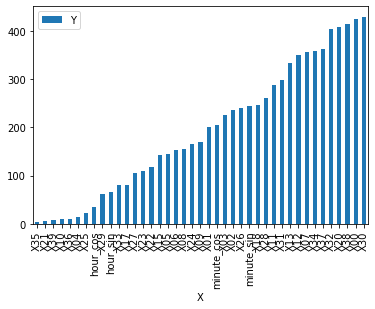

In [0]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(model2.get_fscore().keys()), 'Y': list(model2.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')

In [0]:
X_test_norm = xgb.DMatrix(X_test_norm)
predict_30 = model2.predict(X_test_norm)
predict_3 = model3.predict(X_test_norm)

In [0]:
ensembled_preds = 0.3 * predict_30 + 0.7 * predict_3

submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':ensembled_preds})
submit.to_csv('3_7.csv', index = False)

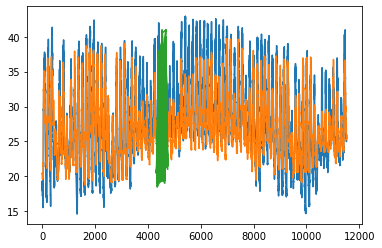

In [0]:
plt.plot(predict_30)
plt.plot(predict_3)
plt.plot(y_train)

In [0]:
sub = pd.read_csv("sample_submission.csv")

In [0]:
sub['Y18']=predict

In [0]:
sub.to_csv("dd.csv",index=False)